# Selecting Basins

In [1]:
import dtcg
import dtcg.integration.oggm_bindings as oggm_bindings
import dtcg.interface.gateway
import dtcg.interface.plotting

A user interacts with DTCG only through API requests.
This means a single centralised framework can handle requests from Jupyter notebooks, websites, and cli wrappers.
Flows are simplified for non-technical users, and can be customised for more advanced use cases.
It also prevents significant changes to the DTCG API interfering with existing flows, as little to no backend code is exposed to the user.

In [2]:
# User selects these via dropdown menus
subregion_name = "vent_rofenache"
glacier_name = "Hintereisferner"

API queries are extensible, as long as they conform to the OpenAPI standard.
For selecting a subregion, this is what an API query could look like:

In [3]:
# A query might look like this
user_query_params = {
    "query": "select_subregion",
    "region_name": "Central Europe",
    "subregion_name": subregion_name,
    "glacier_name": glacier_name,
    "shapefile_path": "nested_catchments_oetztal/nested_catchments_oetztal.shx",
    "oggm_params": {
        "use_multiprocessing": True,
        "rgi_version": "62",
        "store_model_geometry": True,
    },
}
request = dtcg.interface.gateway._set_user_query(**user_query_params)
response = dtcg.interface.gateway.get_query_response(query=request)

2025-01-27 15:51:35: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-01-27 15:51:35: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-01-27 15:51:35: oggm.cfg: Multiprocessing: using all available processors (N=22)
2025-01-27 15:51:35: oggm.cfg: Multiprocessing switched ON after user settings.
2025-01-27 15:51:35: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2025-01-27 15:51:36: oggm.workflow: init_glacier_directories from prepro level 5 on 1 glaciers.
2025-01-27 15:51:36: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


The API is very flexible: it can pass OGGM parameters directly to OGGM, and to preserve bandwidth a response can be customised to contain as little data as needed.

For this example, the response data are synthesised into static plots.
In a dashboard setting, these plots are automatically updated for every user interaction.

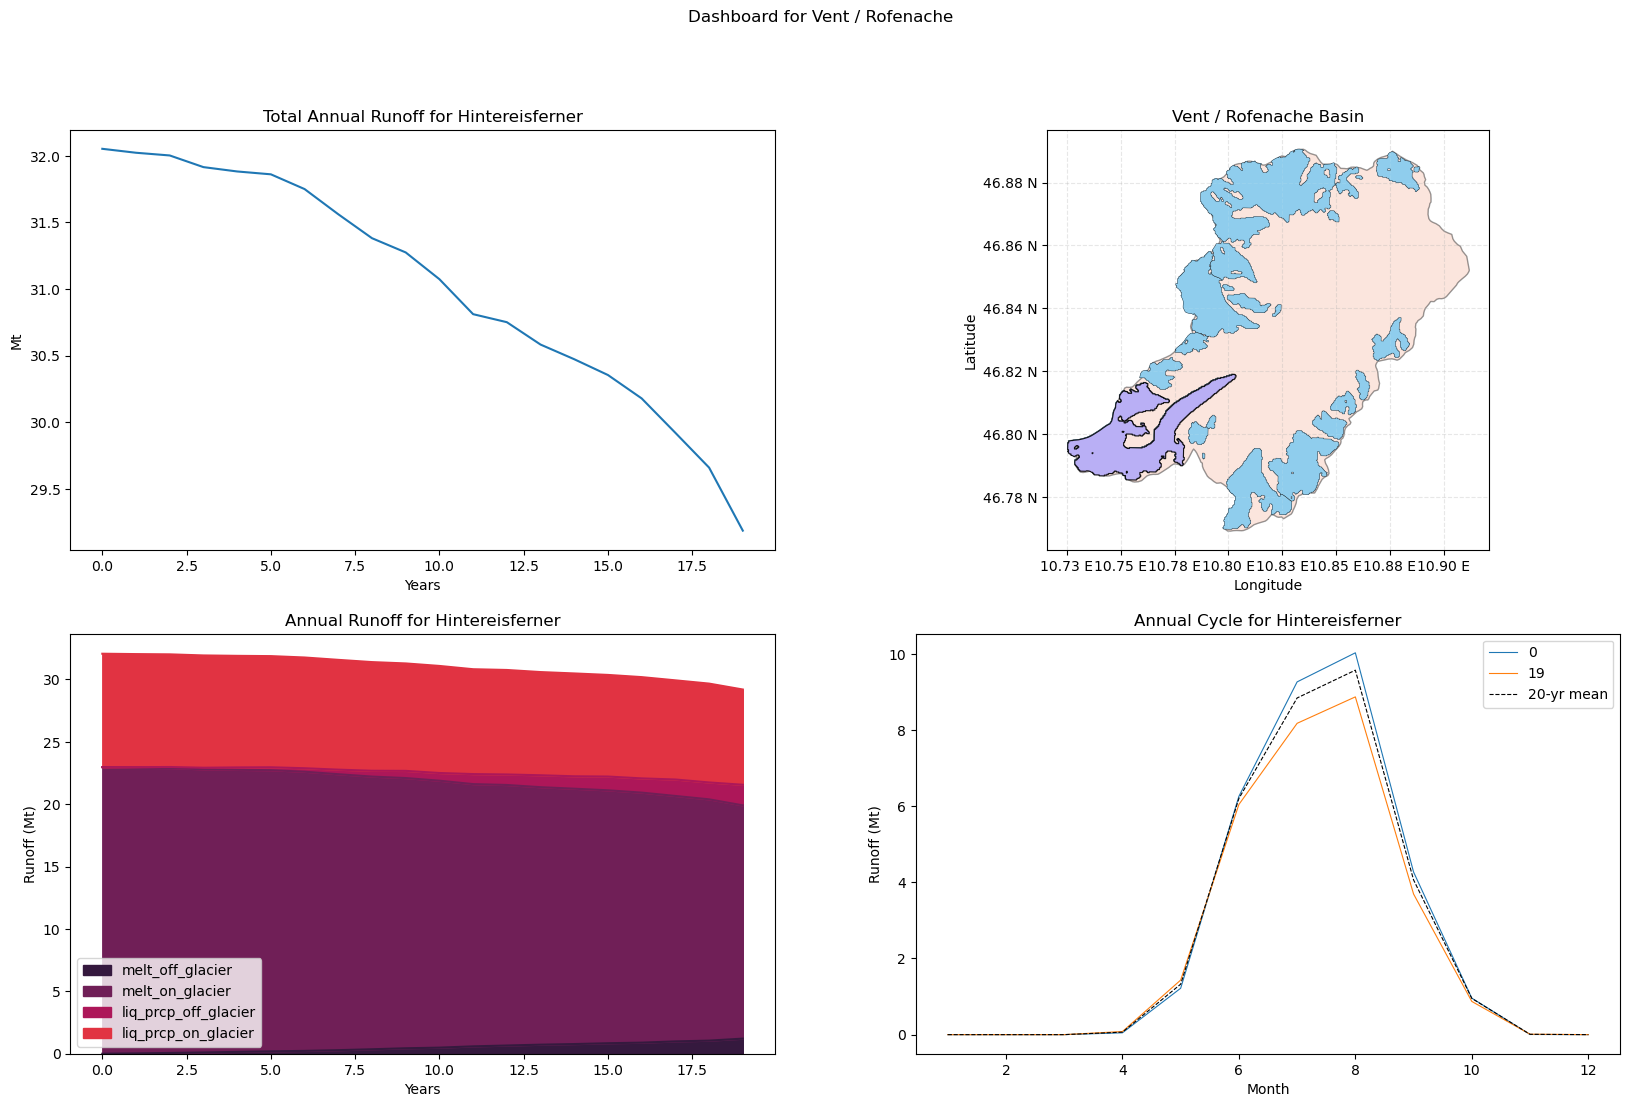

In [4]:
plot_data = dtcg.interface.plotting.plot_runoff_dashboard(
    response=response["data"]["glacier_data"],
    basin_shapefile=response["data"]["shapefile"],
    annual_runoff=response["data"]["runoff_data"]["annual_runoff"],
    monthly_runoff=response["data"]["runoff_data"]["monthly_runoff"],
    min_runoff_year=response["data"]["runoff_data"]["runoff_year_min"],
    max_runoff_year=response["data"]["runoff_data"]["runoff_year_max"],
    subregion_name=request.subregion_name,
    name=request.glacier_name,
)